In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
import matplotlib.pyplot as plt
from arch import arch_model

In [142]:
# ticker = "HSBC LLOY.L NWG.L BARC.L"
# ticker = '^FTSE ^GDAXI ^FCHI FTSEMIB.MI, ^IBEX'
# ticker = "LLOY.L NWG.L BARC.L"
# ticker = "BAC JPM C"
# ticker = "AON PUK WTW" #insurance
# ticker = "XOM SHEL.L"
# ticker = "OYC.BE UAL A1G.SG"
# ticker = "TSCO.L MKS.L SBRY.L"
# ticker = "NVDA INTC"
# ticker = "UNH BRK-B CVS"
# ticker = "VWAGY BMW.DE STLA"
# ticker = "TOMA.F HMC 7201.T" 
# ticker = "SONY NTDOY MSFT"
# ticker = "GOOG META MSFT"
 

# ticker = '^GSPC ^DJI ^IXIC'
# ticker = "LLOY.L NWG.L BARC.L"
# ticker = "JPM BAC MS"
# ticker = "JPM C MS"
# ticker = "BAC GS MS"
# ticker = "BAC TFC MS"
# ticker = "BAC GS TD"
# ticker = "LGEN.L AV.L PHNX.L"

# ticker = '^GSPC ^DJI ^IXIC'
# ticker = "BAC GS MS"
# ticker = "BAC C MS"

# ticker = "JPM C" #start="1990-01-01", end="2025-02-01"  "1d"
# ticker = "JPM C MS" #start="1995-01-01", end="2025-02-01"  "1d"
# ticker = '^GSPC ^DJI ^IXIC' #start="2000-01-01", end="2025-02-01"  "1d"
# ticker = "BAC GS" #Raw start="2005-01-01", end="2025-02-01"  "1d"
# ticker = "BAC JPM C" #Raw start="2005-01-01", end="2025-02-01"  "1d"


ticker = "JPM BAC C WFC MS" #Raw start="2005-01-01", end="2025-02-01"  "5d"


data = yf.download(ticker, start="2005-01-01", end="2025-02-01", interval='5d')
# data.interpolate(inplace=True)

[*********************100%***********************]  5 of 5 completed


In [138]:
df_log_return.shape

(1010, 5)

In [143]:
neg_log_return = {}

for company in data['Close'].columns:
    neg_log_return[company] = -(np.log(data['Close'][company]) - np.log(data['Close'][company].shift(1)))

df_log_return = pd.DataFrame(neg_log_return)
df_log_return = df_log_return.iloc[1:,:]

neg_return = {}
for company in data['Close'].columns:
    neg_return[company] = -(np.log(data['Close'][company]).pct_change())
df_return = pd.DataFrame(neg_return)
df_return = df_return.iloc[1:,:]

# sns.pairplot(df_log_return)
# sns.pairplot(df_return)

In [59]:
lag = 1

Stock_1 = 100*df_log_return.iloc[:,0]
Stock_2 = 100*df_log_return.iloc[:,1]
Stock_3 = 100*df_log_return.iloc[:,2]
Stock_4 = 100*df_log_return.iloc[:,3]
Stock_5 = 100*df_log_return.iloc[:,4]
# Stock_6 = 100*df_log_return.iloc[:,5]

Stock_1_model = arch_model(Stock_1, mean='AR', lags=lag, vol='GARCH', p=lag, q=lag, dist='normal')
Stock_1_res= Stock_1_model.fit(update_freq=0)

Stock_2_model = arch_model(Stock_2, mean='AR', lags=lag, vol='GARCH', p=lag, q=lag, dist='normal')
Stock_2_res= Stock_2_model.fit(update_freq=0)

Stock_3_model = arch_model(Stock_3, mean='AR', lags=lag, vol='GARCH', p=lag, q=lag, dist='normal')
Stock_3_res= Stock_3_model.fit(update_freq=0)

Stock_4_model = arch_model(Stock_4, mean='AR', lags=1, vol='GARCH', p=1, q=1, dist='normal')
Stock_4_res= Stock_4_model.fit(update_freq=0)

Stock_5_model = arch_model(Stock_5, mean='AR', lags=1, vol='GARCH', p=1, q=1, dist='normal')
Stock_5_res= Stock_5_model.fit(update_freq=0)

# Stock_6_model = arch_model(Stock_6, mean='AR', lags=1, vol='GARCH', p=1, q=1, dist='normal')
# Stock_6_res= Stock_6_model.fit(update_freq=0)


Stock_1_z = Stock_1_res.resid/Stock_1_res.conditional_volatility
Stock_1_z = Stock_1_z[lag:]

Stock_2_z = Stock_2_res.resid/Stock_2_res.conditional_volatility
Stock_2_z = Stock_2_z[lag:]

Stock_3_z = Stock_3_res.resid/Stock_3_res.conditional_volatility
Stock_3_z = Stock_3_z[lag:]

Stock_4_z = Stock_4_res.resid/Stock_4_res.conditional_volatility
Stock_4_z = Stock_4_z[1:]

Stock_5_z = Stock_5_res.resid/Stock_5_res.conditional_volatility
Stock_5_z = Stock_5_z[1:]

# Stock_6_z = Stock_6_res.resid/Stock_6_res.conditional_volatility
# Stock_6_z = Stock_6_z[1:]

Optimization terminated successfully    (Exit mode 0)
            Current function value: 2950.3316486906856
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2985.497804033931
            Iterations: 15
            Function evaluations: 105
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2833.606816597877
            Iterations: 11
            Function evaluations: 81
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2744.9638721983765
            Iterations: 9
            Function evaluations: 69
            Gradient evaluations: 9
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2774.438149649268
            Iterations: 12
            Function evaluat

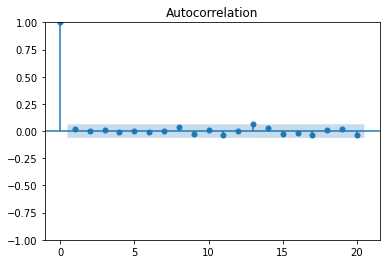


ARCH test results:
Test Statistic: 207.9418
P-value: 0.0000


In [60]:
plot_acf(Stock_1_z,lags=20)
plt.show()
acorr_ljungbox(Stock_1_z, lags=[1], return_df=True)

arch_test_stat, arch_test_pvalue, _, _ = het_arch(Stock_3_res.resid[10:], nlags=3)
print("\nARCH test results:")
print(f"Test Statistic: {arch_test_stat:.4f}")
print(f"P-value: {arch_test_pvalue:.4f}")

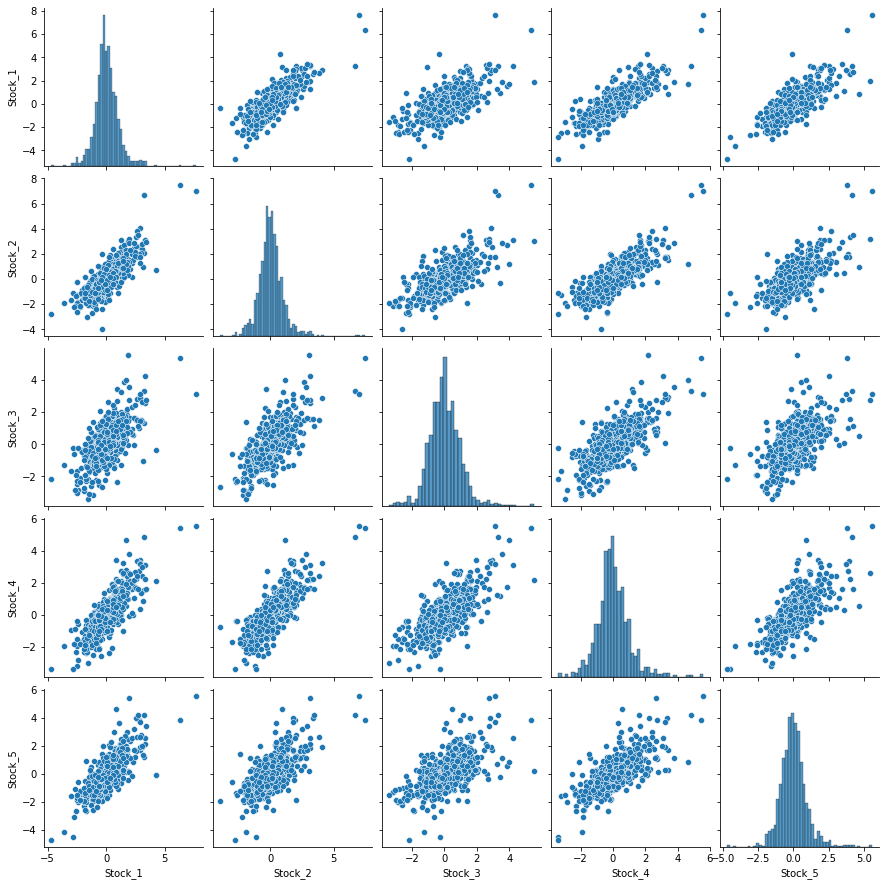

In [61]:
df_GPD = pd.DataFrame({'Stock_1':Stock_1_z,
                       'Stock_2':Stock_2_z,
                       'Stock_3': Stock_3_z,
                       'Stock_4': Stock_4_z,
                       'Stock_5': Stock_5_z ,
                      #  'Stock_6': Stock_6_z ,
                         })
sns.pairplot(df_GPD)

In [ ]:
samples = df_log_return.values
dir_out = "/home/pgrad2/2448355h/My_PhD_Project/01_Output/GPDFlow/"
with open(dir_out + f'financial_data.npy', 'wb') as f:
    np.save(f, samples)

In [147]:
np.savetxt(dir_out + 'financial_data.csv', samples, delimiter=",")

Text(0.5, 1.0, 'lambda')

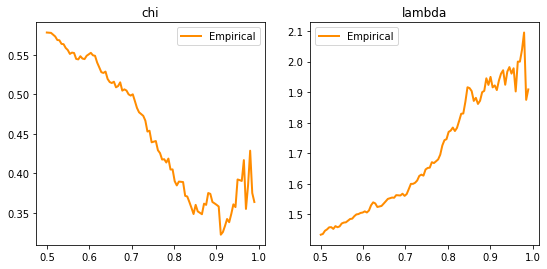

In [145]:
def empirical_conditional_tail_dependence(X, p, cond = 'and'):

    # Compute the quantiles
    quantile = np.quantile(X, p, axis = 0)
    
    # Count joint exceedances
    joint_exceedance = X[:,0] > quantile[0]
    if cond == 'and':
        for j in range(1,X.shape[1]):
            joint_exceedance &= X[:,j] > quantile[j]
    else:
        for j in range(1,X.shape[1]):
            joint_exceedance |= X[:,j] > quantile[j]
        
    exceedance_X1 = np.sum(X[:,0] > quantile[0])
    joint_exceedance = np.sum(joint_exceedance)
    # Calculate lambda_u
    if exceedance_X1 == 0:  # Avoid division by zero
        return 0.0
    chi_u = joint_exceedance / exceedance_X1
    return chi_u
probs = np.linspace(0.50, 0.99, 100)
chi_emp = [empirical_conditional_tail_dependence(df_log_return.values, p, 'and') for p in probs]
plt.figure(figsize=(9,9))
plt.subplot(2, 2, 1)
ax = sns.lineplot(x=probs, y=chi_emp, label='Empirical', color='darkorange', linewidth=2)
ax.set_title('chi')

chi_emp = [empirical_conditional_tail_dependence(df_log_return.values, p, 'or') for p in probs]
plt.subplot(2, 2, 2)
ax = sns.lineplot(x=probs, y=chi_emp, label='Empirical', color='darkorange', linewidth=2)
ax.set_title('lambda')

In [148]:
df_log_return

,BAC,C,JPM,MS,WFC
Date,,,,,
2005-01-11,0.000885,0.014617,0.021146,0.014858,0.003863
2005-01-21,0.001994,0.006032,0.028095,0.012767,0.030953
2005-01-26,-0.014968,-0.011409,0.000543,0.005706,-0.012398
2005-01-31,-0.013024,-0.011689,-0.013484,-0.032510,-0.007039
2005-02-10,-0.012004,-0.007468,-0.003210,-0.050695,0.006497
...,...,...,...,...,...
2024-12-27,0.015886,0.001689,-0.011720,0.007701,-0.004228
2025-01-06,-0.023625,-0.024212,-0.003824,-0.014722,-0.012855
2025-01-16,-0.026946,-0.076335,-0.054222,-0.054239,-0.052993
